In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv(r'C:\Users\dsadm\Desktop\danna\Big Data e IA\avaliation\dadosacoes.csv')

In [32]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [34]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [35]:
df.tail()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866
99,VALE3,111,19,230


C:\Users\dsadm\AppData\Local\Temp\ipykernel_14136\1495640830.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='preço ação R$', data=df, palette='Set3')


Text(0, 0.5, 'Action Price')

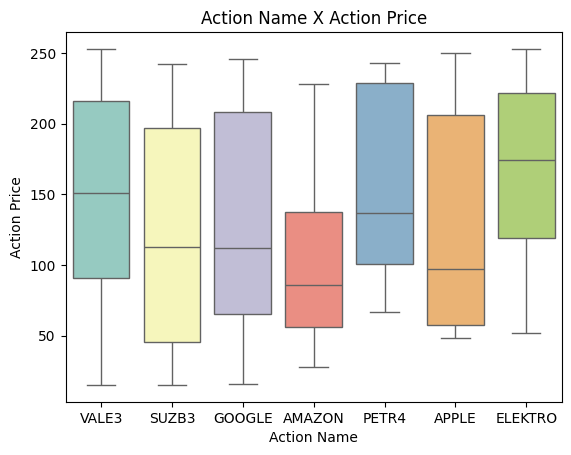

In [36]:
sns.boxplot(x='nome ação', y='preço ação R$', data=df, palette='Set3')
plt.title('Action Name X Action Price')
plt.xlabel('Action Name')
plt.ylabel('Action Price')

C:\Users\dsadm\AppData\Local\Temp\ipykernel_14136\785287557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df, palette='Set1')


Text(0, 0.5, 'Market Value')

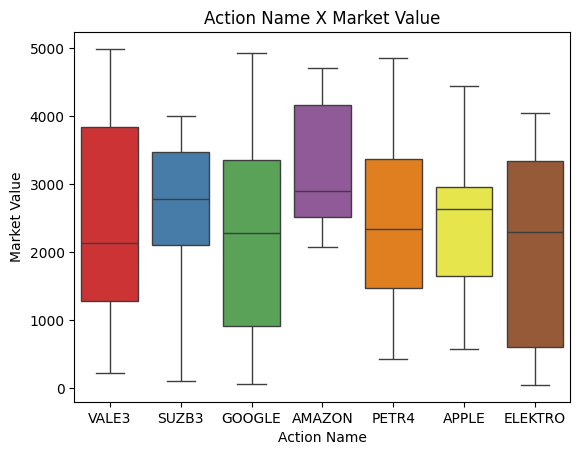

In [37]:
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df, palette='Set1')
plt.title('Action Name X Market Value')
plt.xlabel('Action Name')
plt.ylabel('Market Value')

In [38]:
dummies = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

In [39]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

kmeans4 = KMeans(n_clusters=4, random_state=0).fit(features)
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(features)
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(features)

c:\Users\dsadm\Desktop\danna\Big Data e IA\avaliation\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\Desktop\danna\Big Data e IA\avaliation\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\Desktop\danna\Big Data e IA\avaliation\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


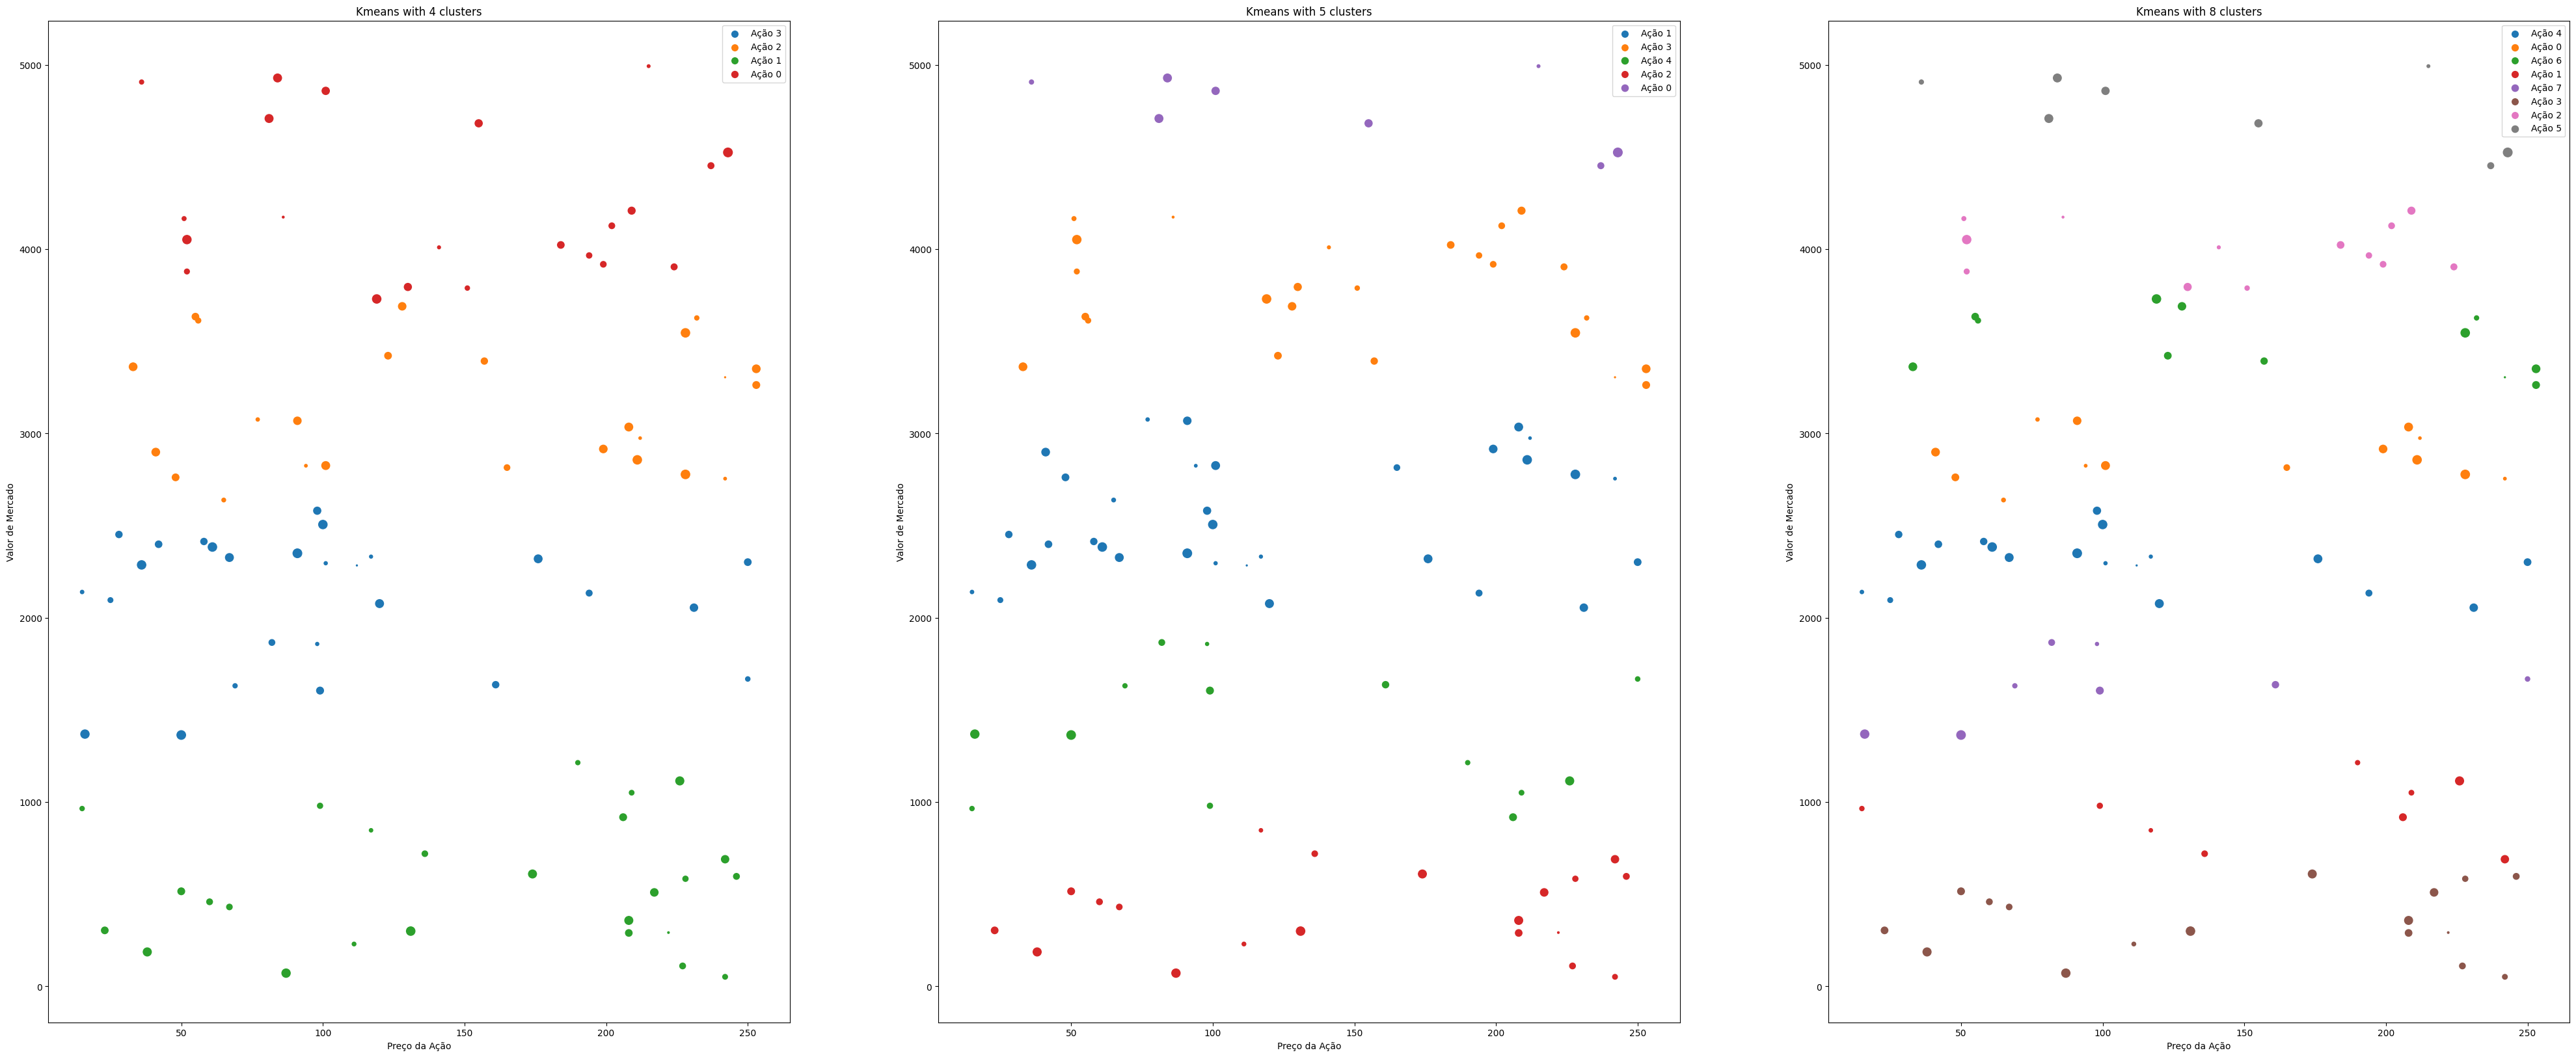

In [40]:
fig = plt.figure(figsize=(50, 20))

value = 131

for kmean in [kmeans4, kmeans5, kmeans8]:
    dummies['Cluster'] = kmean.labels_
    ax = fig.add_subplot(value)   
    
    
    for cluster in dummies['Cluster'].unique():
        cluster_data = dummies[dummies['Cluster'] == cluster]
        ax.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Ação {cluster}')
    
    ax.set_xlabel('Preço da Ação')
    ax.set_ylabel('Valor de Mercado')
    ax.set_title(f'Kmeans with {kmean.n_clusters} clusters')
    plt.legend()
    value += 1

plt.show()

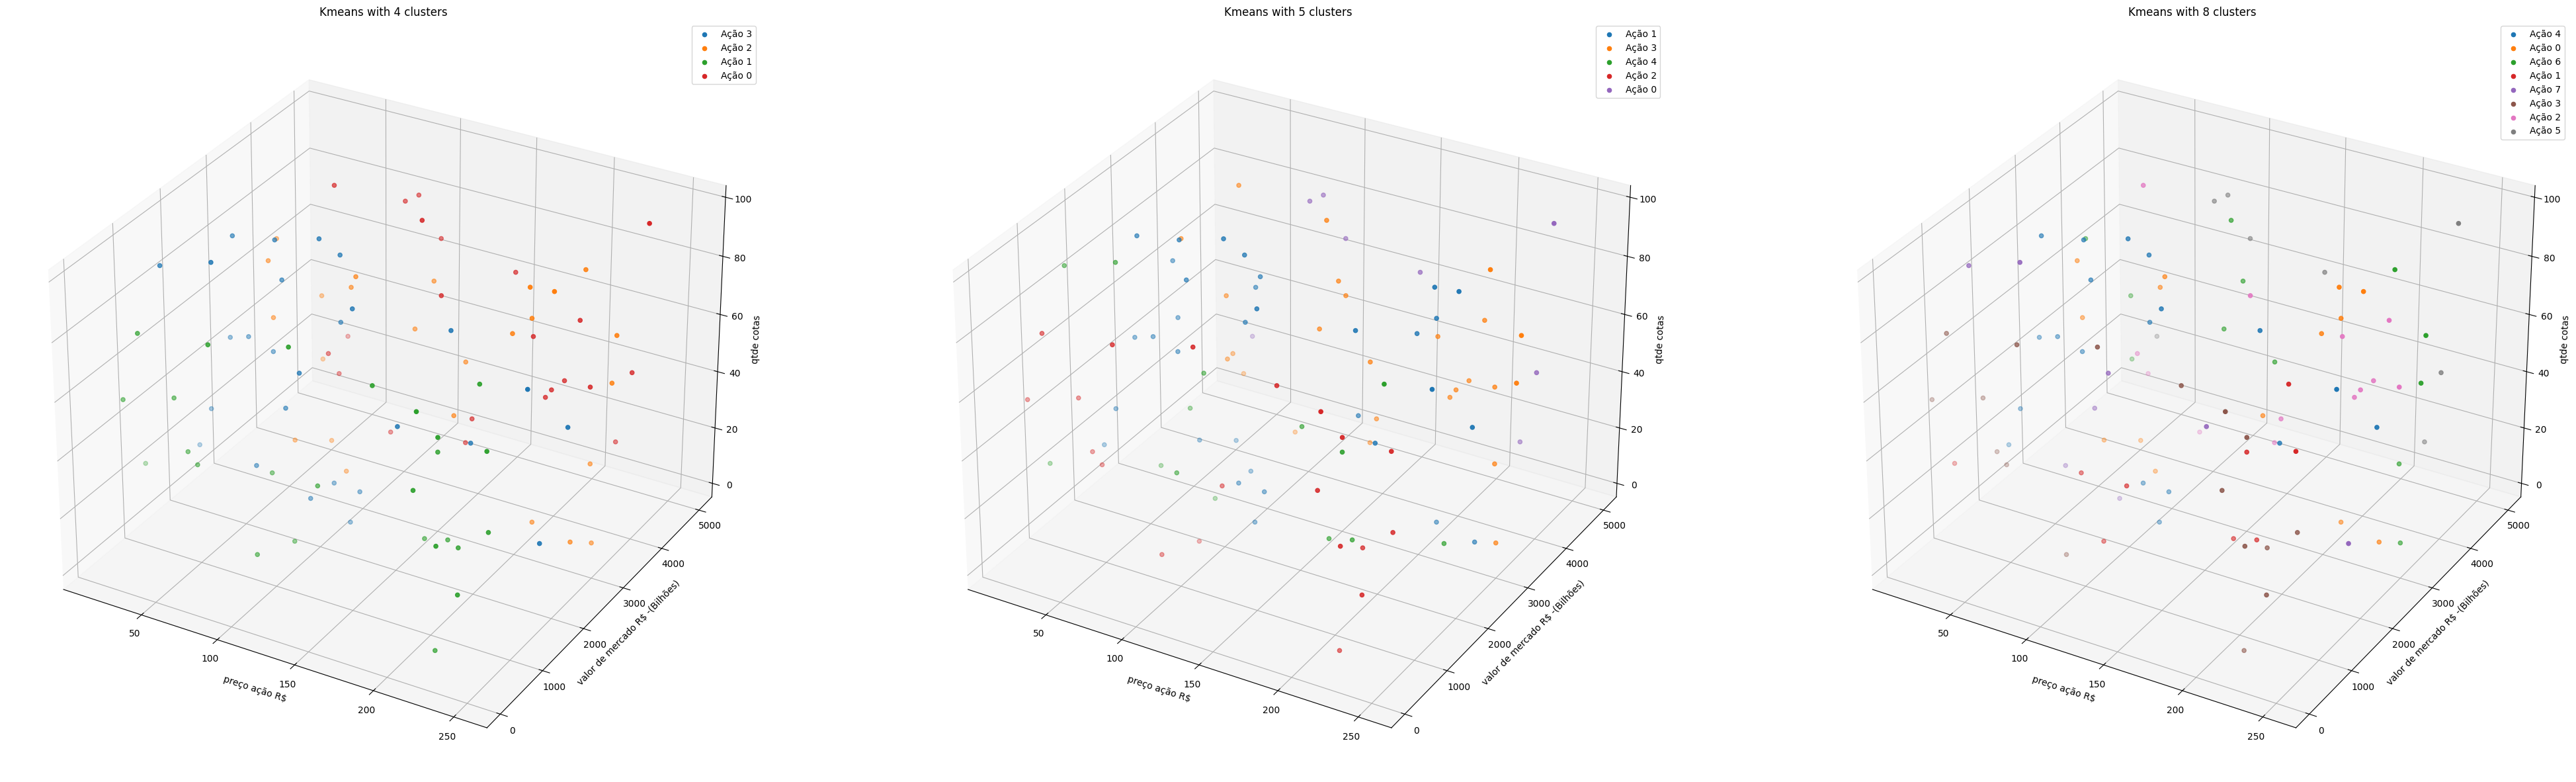

In [41]:
fig = plt.figure(figsize=(50, 20))

value = 131

for kmean in [kmeans4, kmeans5, kmeans8]:
    dummies['Cluster'] = kmean.labels_
    ax = fig.add_subplot(value, projection='3d')   
    
    
    for cluster in dummies['Cluster'].unique():
        cluster_data = dummies[dummies['Cluster'] == cluster]
        ax.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['qtde cotas'], label=f'Ação {cluster}')
    
    ax.set_xlabel('preço ação R$')
    ax.set_ylabel('valor de mercado R$ -(Bilhões)')
    ax.set_zlabel('qtde cotas')
    ax.set_title(f'Kmeans with {kmean.n_clusters} clusters')
    plt.legend()
    
    value += 1

plt.show()

Nota: AnS = Aprendizado não Supervisionado AS = Aprendizado Supervisionado

O aprendizado não supervisionado nos permite treinar modelos de forma mais prática. Enquanto no AS precisamos definir elemento por elemento para o programa, no AnS simplesmente passamos o conjunto de dados, definimos algumas métricas e deixamos o programar entender com o que estamos trabalhando. Resumindo, ele é perfeito para descobrir padrões que não conhecemos, trabalhar com grandes conjuntos de dados e menos suscetível a error por não ter dados rotulados.